In [1]:
#Loading Data and Analysing Weather Data
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
DB_NAME=os.path.join("data","weather.db")

def load_data():
    conn=sqlite3.connect(DB_NAME)
    df=pd.read_sql_query("SELECT * FROM weather",conn)
    conn.close()
    return df

def city_temperature_analysis(df):
    max_temp = df.loc[df['temperature'].idxmax()]
    min_temp = df.loc[df['temperature'].idxmin()]
    print(f"Highest temperature: {max_temp['city']} ({max_temp['temperature']}°C)")
    print(f"Lowest temperature: {min_temp['city']} ({min_temp['temperature']}°C)")

def city_humidity_analysis(df):
    max_humidity = df.loc[df['humidity'].idxmax()]
    min_humidity = df.loc[df['humidity'].idxmin()]
    print(f"Highest humidity: {max_humidity['city']} ({max_humidity['humidity']}%)")
    print(f"Lowest humidity: {min_humidity['city']} ({min_humidity['humidity']}%)")

def filter_and_sort(df, temp_threshold=25, humidity_threshold=50):
    print("\nCities with temperature > {}°C:".format(temp_threshold))
    print(df[df['temperature'] > temp_threshold].sort_values(by='temperature', ascending=False))
    
    print("\nCities with humidity < {}%:".format(humidity_threshold))
    print(df[df['humidity'] < humidity_threshold].sort_values(by='humidity'))

def group_and_aggregate(df):
    weather_counts = df.groupby('weather')['city'].count()
    print("\nCities grouped by weather conditions:")
    print(weather_counts)

def statistical_insights(df):
    print(f"\nAverage Temperature: {df['temperature'].mean():.2f}°C")
    print(f"Average Humidity: {df['humidity'].mean():.2f}%")
    print(f"Highest Temperature: {df['temperature'].max():.2f}°C")
    print(f"Lowest Temperature: {df['temperature'].min():.2f}°C")

def visualize(df):
    # Temperature
    plt.figure(figsize=(10,5))
    sns.barplot(x='city', y='temperature', data=df, palette="Oranges")
    plt.title("Temperature Across Cities")
    plt.ylabel("Temperature (°C)")
    plt.show()

    # Humidity
    plt.figure(figsize=(10,5))
    sns.barplot(x='city', y='humidity', data=df, palette="Blues")
    plt.title("Humidity Across Cities")
    plt.ylabel("Humidity (%)")
    plt.show()

    # Weather type count
    plt.figure(figsize=(8,5))
    df.groupby('weather')['city'].count().plot(kind='bar', color='green')
    plt.title("Number of Cities by Weather Type")
    plt.ylabel("Number of Cities")
    plt.show()


Inserted: Dubai
Inserted: London
Inserted: Mumbai
Inserted: New York
Inserted: Sydney
Inserted: Islamabad
Inserted: Melbourne
Inserted: California
Inserted: Karachi
Inserted: Delhi
Highest temperature: Dubai (30.96°C)
Lowest temperature: Melborn (10.25°C)
Highest humidity: California (95.0%)
Lowest humidity: Karachi (25.0%)

Cities with temperature > 25°C:
    id     city  temperature  humidity weather    description  \
8   10    Dubai        30.96      55.0   Clear      clear sky   
38  40    Dubai        30.96      58.0   Clear      clear sky   
28  30    Dubai        30.96      58.0   Clear      clear sky   
58  60    Dubai        30.96      58.0   Clear      clear sky   
48  50    Dubai        30.96      58.0   Clear      clear sky   
18  20    Dubai        29.96      58.0   Clear      clear sky   
68  70    Dubai        29.96      58.0   Clear      clear sky   
6    8  Karachi        29.90      25.0    Haze           haze   
26  28  Karachi        27.90      30.0    Haze          

C:\Users\DELL\AppData\Local\Temp\ipykernel_12024\172299906.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='temperature', data=df, palette="Oranges")


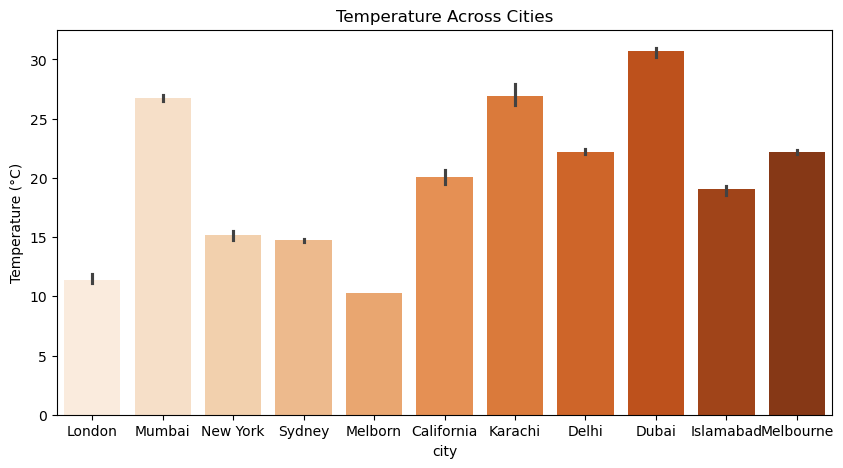

C:\Users\DELL\AppData\Local\Temp\ipykernel_12024\172299906.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='humidity', data=df, palette="Blues")


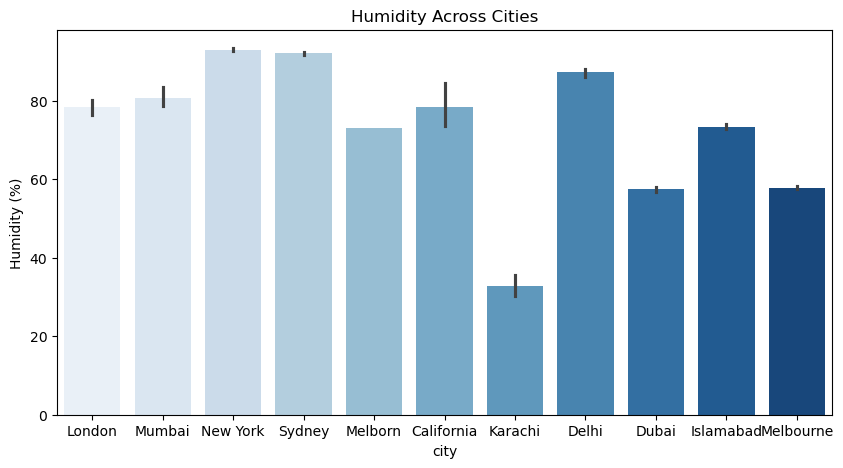

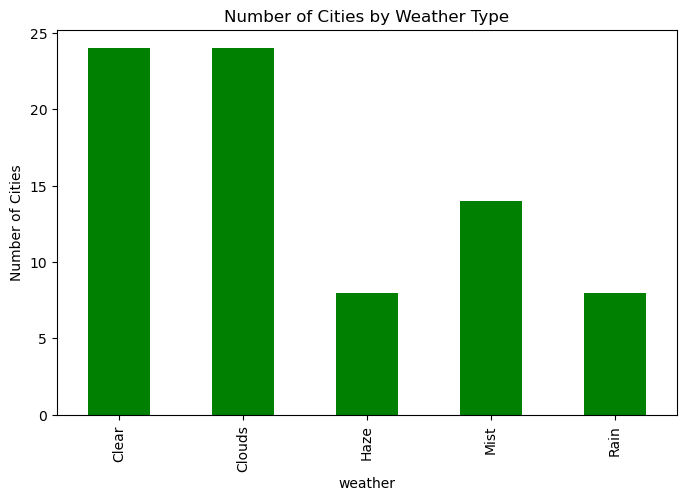

In [2]:
# We Will Use All The Supporting Files to Perform Analysis

from fetch_weather import fetch_weather
import database_manager as db

def main():
    cities = ["Dubai", "London", "Mumbai", "New York", "Sydney",
              "Islamabad", "Melbourne", "California", "Karachi", "Delhi"]

    # Create DB and table
    db.create_table()

    # Fetch and insert weather data
    for city in cities:
        data = fetch_weather(city)
        if data:
            db.insert_weather(data)
            print(f"Inserted: {city}")

    # Load data for analysis
    df = load_data()

    # Perform analysis
    city_temperature_analysis(df)
    city_humidity_analysis(df)
    filter_and_sort(df)
    group_and_aggregate(df)
    statistical_insights(df)
    visualize(df)

if __name__ == "__main__":
    main()
